## Graphical representations

In [2]:
#Loading
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme()

pd.set_option('display.max_columns', None) # displaying all columns
merged_df = pd.read_csv('../data/merged_df.csv', low_memory=False) # loading the merged dataframe

CalYear modalities in percent:
2022    8.3
2009    8.1
2010    7.6
2021    7.3
2019    7.1
2018    7.1
2011    7.1
2020    6.9
2017    6.8
2012    6.7
2016    6.7
2013    6.3
2015    6.1
2014    5.9
2023    2.0
Name: CalYear, dtype: float64


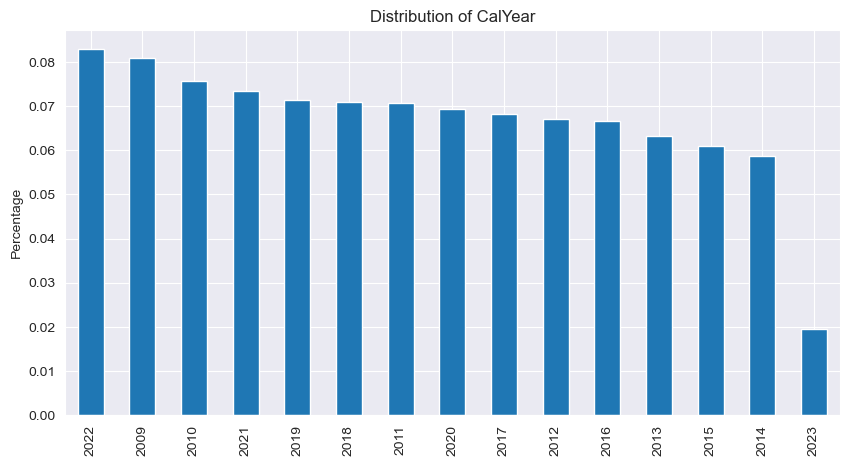



HourOfCall modalities in percent:
19    6.3
18    6.3
17    6.0
20    5.8
16    5.5
15    5.3
13    5.3
21    5.2
14    5.2
12    5.1
11    4.9
22    4.6
10    4.6
9     4.3
23    3.9
8     3.5
0     3.3
1     2.7
7     2.6
2     2.2
3     1.9
6     1.9
4     1.7
5     1.7
Name: HourOfCall, dtype: float64


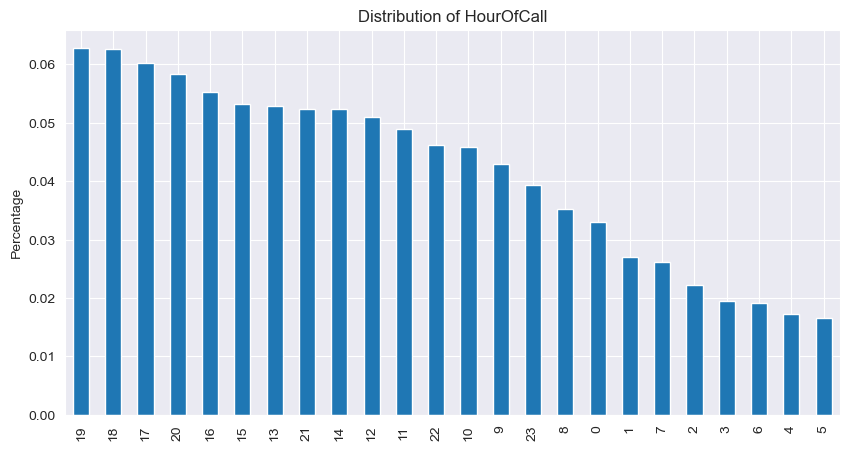



PerformanceReporting modalities in percent:
1           66.5
2           25.9
Not Used     7.7
Name: PerformanceReporting, dtype: float64


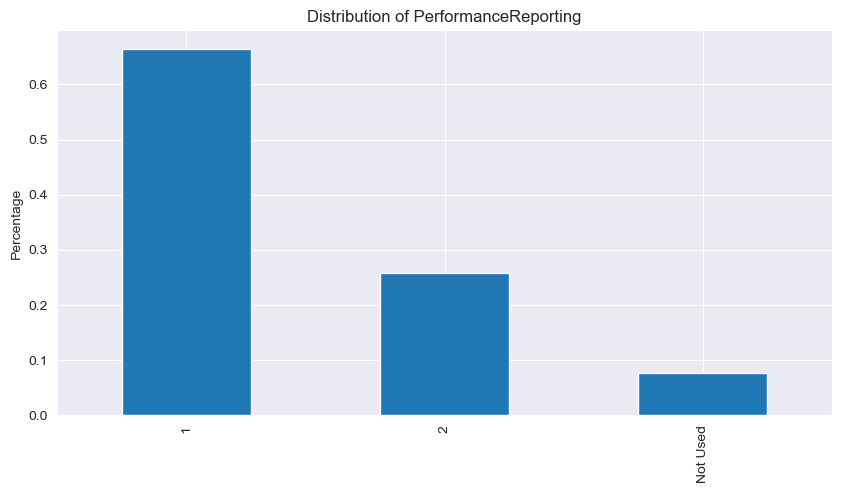



DeployedFromLocation modalities in percent:
Home Station     96.7
Other Station     3.3
Name: DeployedFromLocation, dtype: float64


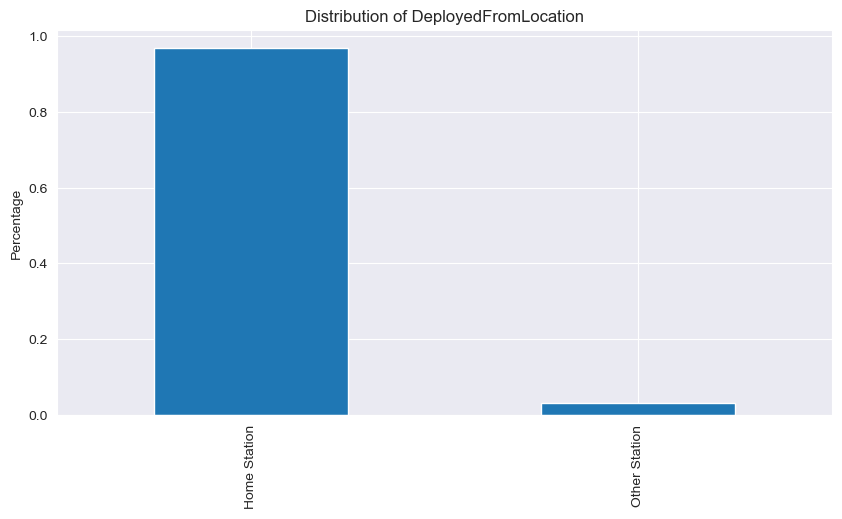



PumpOrder modalities in percent:
1     66.5
2     25.9
3      5.2
4      1.5
5      0.9
6      0.0
7      0.0
8      0.0
9      0.0
11     0.0
10     0.0
12     0.0
13     0.0
Name: PumpOrder, dtype: float64


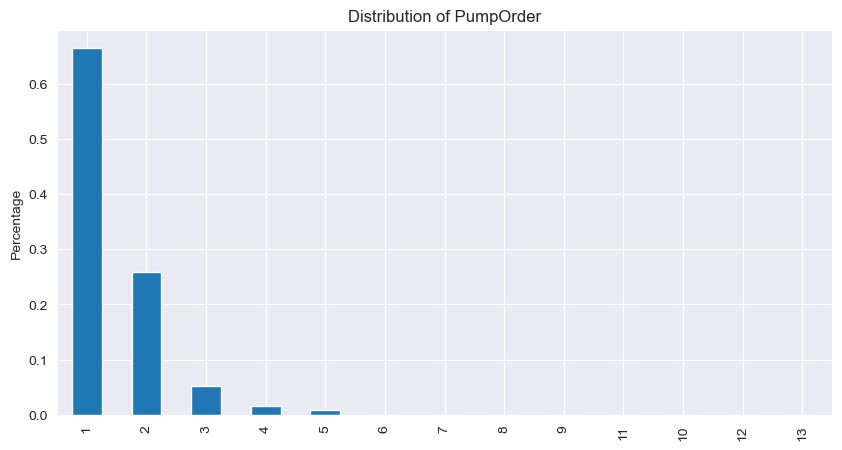



PlusCode_Code modalities in percent:
Initial    99.6
add         0.2
rca         0.2
Name: PlusCode_Code, dtype: float64


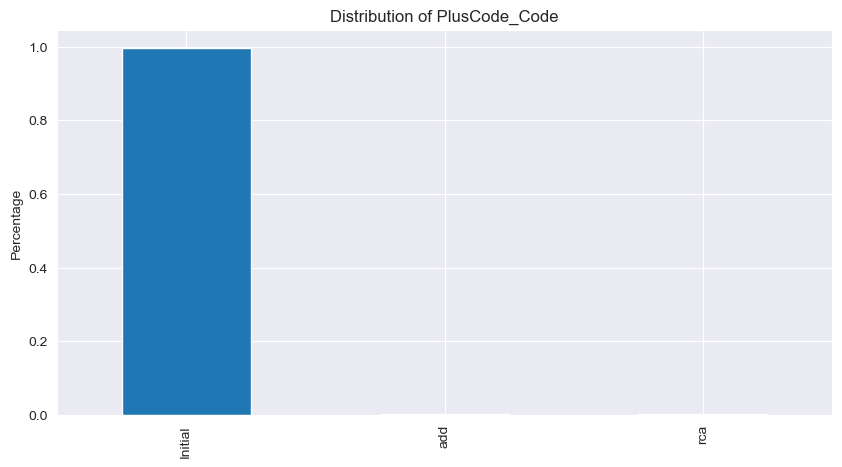



PlusCode_Description modalities in percent:
Initial Mobilisation            99.6
Addition to first attendance     0.2
Running call                     0.2
Name: PlusCode_Description, dtype: float64


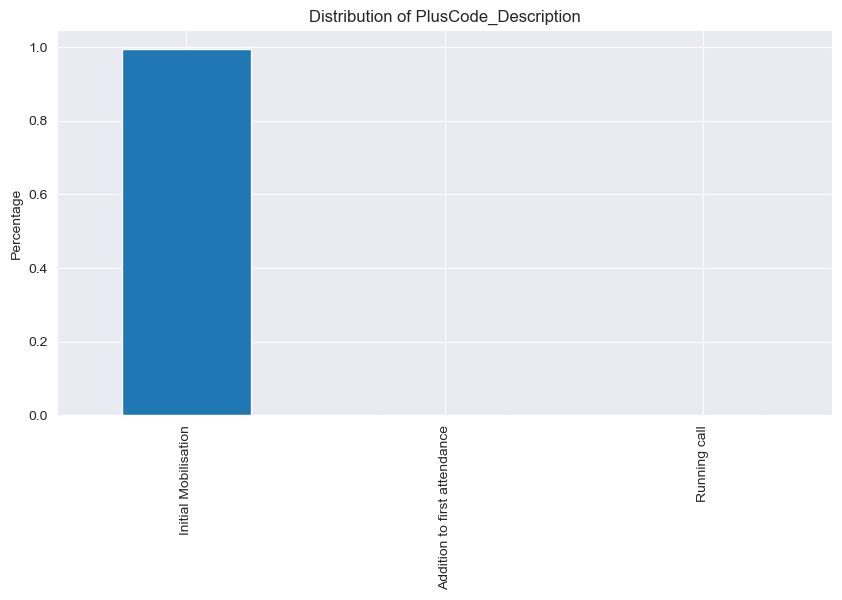



DelayCodeId modalities in percent:
12.0    59.0
9.0     19.4
5.0      6.3
8.0      6.2
7.0      3.5
11.0     1.8
13.0     1.6
10.0     1.3
6.0      0.5
3.0      0.5
Name: DelayCodeId, dtype: float64


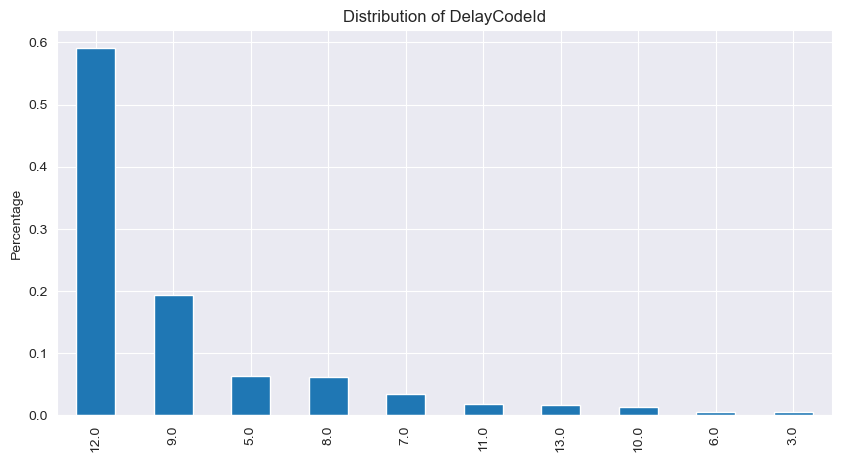



DelayCode_Description modalities in percent:
Not held up                           59.0
Traffic, roadworks, etc               19.4
Address incomplete/wrong               6.3
Traffic calming measures               6.2
Arrived but held up - Other reason     3.5
Mob/Radio problems when mobilised      1.8
On outside duty when mobilised         1.6
Weather conditions                     1.3
Appliance/Equipment defect             0.5
At drills when mobilised               0.5
Name: DelayCode_Description, dtype: float64


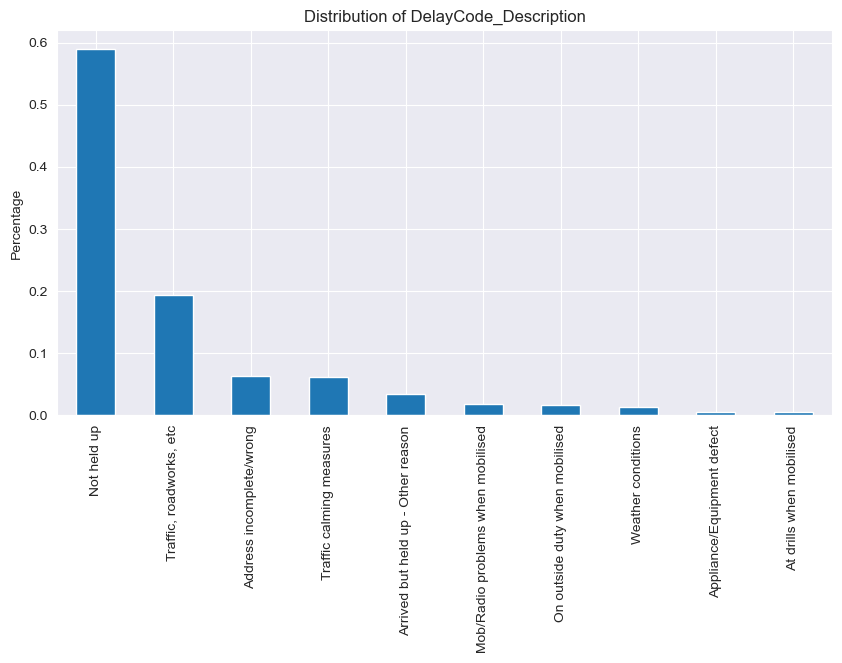



IncidentGroup modalities in percent:
False Alarm        58.0
Special Service    21.4
Fire               20.5
Name: IncidentGroup, dtype: float64


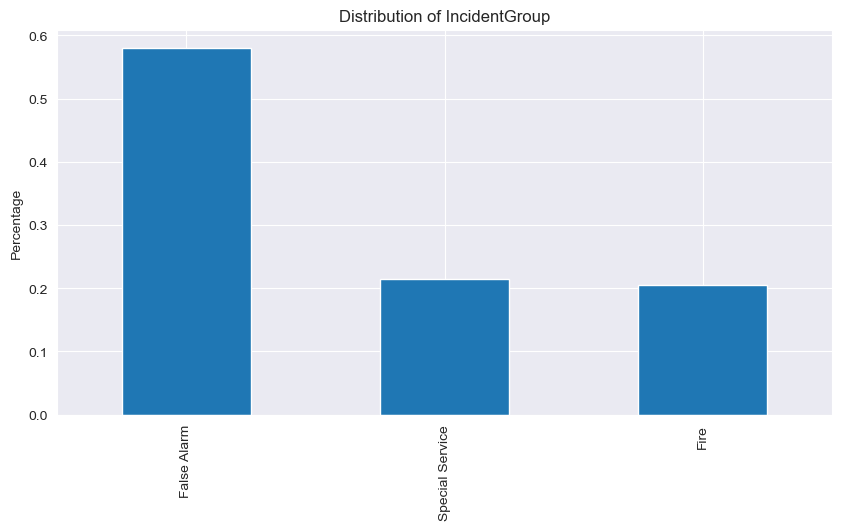



StopCodeDescription modalities in percent:
AFA                               43.4
Special Service                   21.4
False alarm - Good intent         13.0
Primary Fire                      12.9
Secondary Fire                     7.6
False alarm - Malicious            1.6
Chimney Fire                       0.0
Late Call                          0.0
Use of Special Operations Room     0.0
Name: StopCodeDescription, dtype: float64


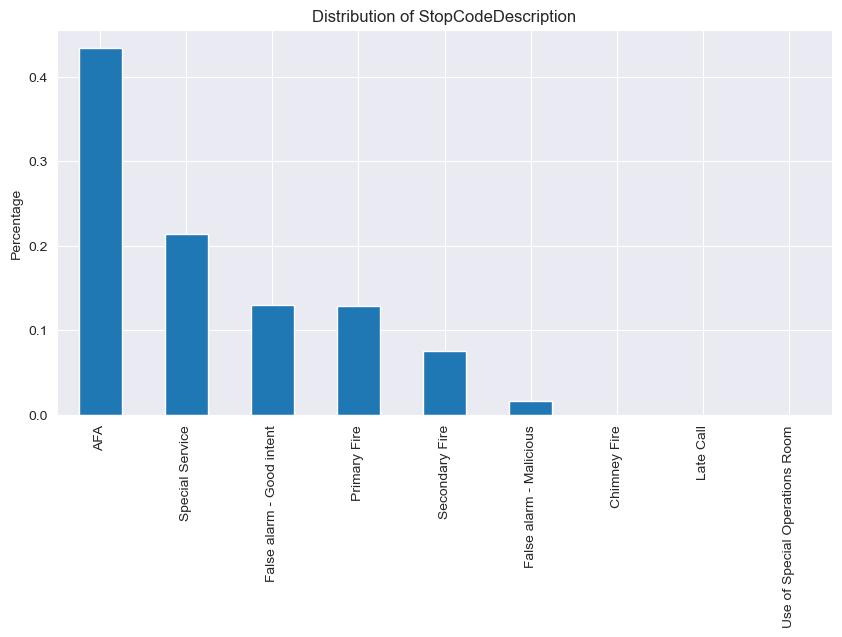



SpecialServiceType modalities in percent:
Effecting entry/exit               21.3
Flooding                           19.7
RTC                                18.2
No action (not false alarm)         7.5
Lift Release                        7.0
Assist other agencies               3.7
Making Safe (not RTC)               3.6
Spills and Leaks (not RTC)          3.4
Hazardous Materials incident        2.6
Advice Only                         2.0
Animal assistance incidents         1.8
Medical Incident                    1.7
Other rescue/release of persons     1.6
Removal of objects from people      1.3
Other Transport incident            1.3
Evacuation (no fire)                1.1
Suicide/attempts                    0.9
Stand By                            0.5
Medical Incident - Co-responder     0.5
Rescue or evacuation from water     0.3
Water provision                     0.0
Name: SpecialServiceType, dtype: float64


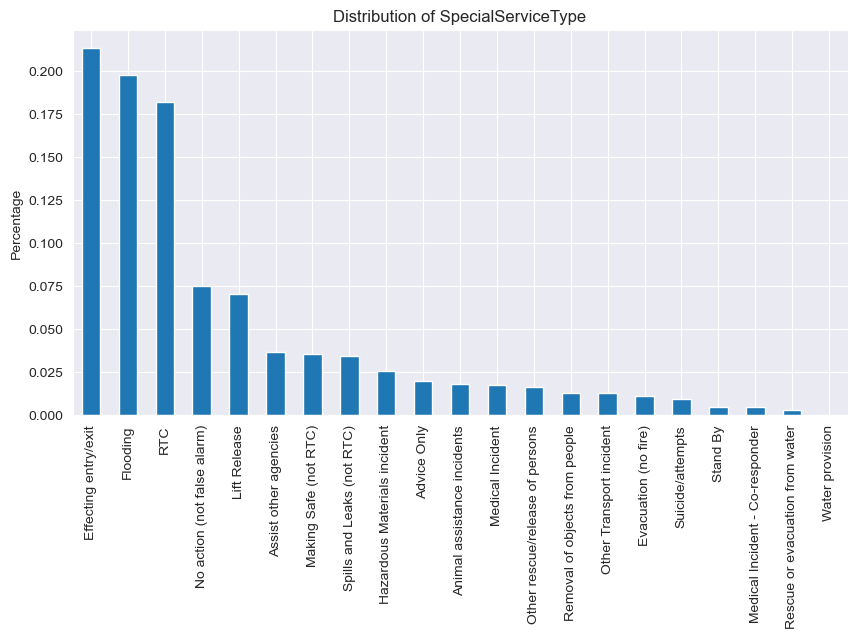



PropertyCategory modalities in percent:
Dwelling             52.4
Non Residential      20.6
Other Residential     7.8
Outdoor               7.3
Road Vehicle          6.8
Outdoor Structure     4.8
Rail Vehicle          0.1
Aircraft              0.1
Boat                  0.1
Name: PropertyCategory, dtype: float64


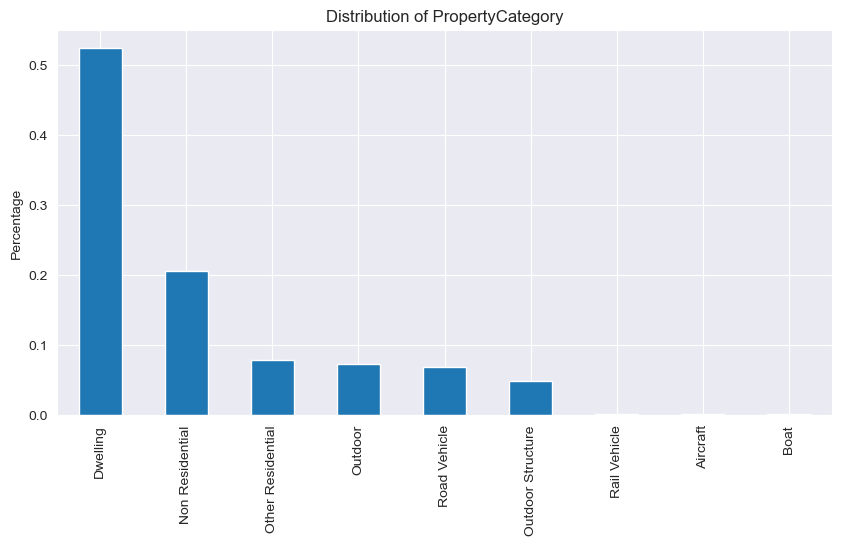



AddressQualifier modalities in percent:
Correct incident location                          59.3
Within same building                               20.7
In street outside gazetteer location                6.1
On land associated with building                    5.6
In street close to gazetteer location               4.0
Open land/water - nearest gazetteer location        2.3
Nearby address - street not listed in gazetteer     0.7
Nearby address - no building in street              0.4
In street remote from gazetteer location            0.4
On motorway / elevated road                         0.4
Railway land or rolling stock                       0.1
Name: AddressQualifier, dtype: float64


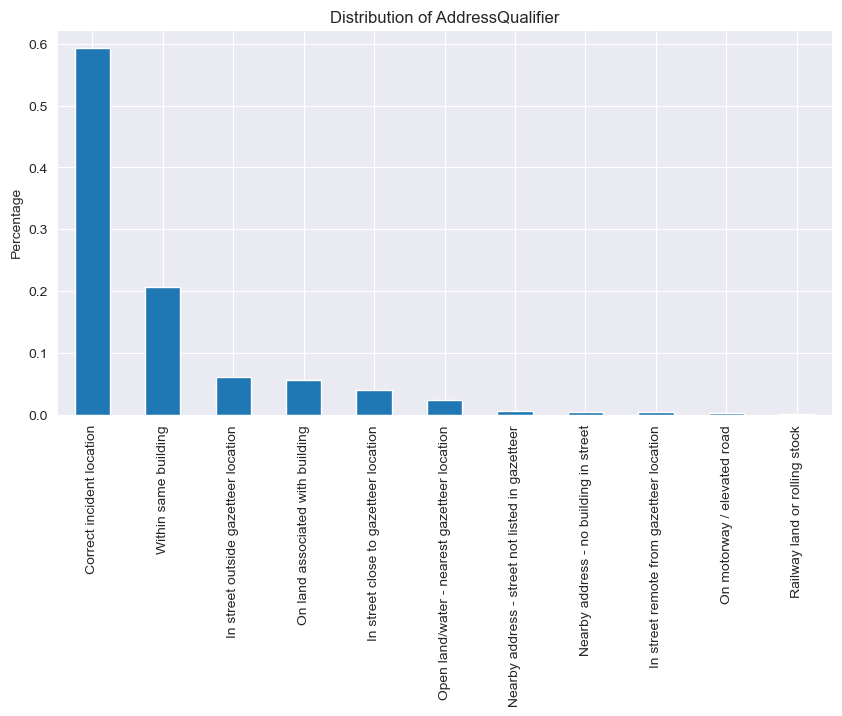



FRS modalities in percent:
London    100.0
Name: FRS, dtype: float64


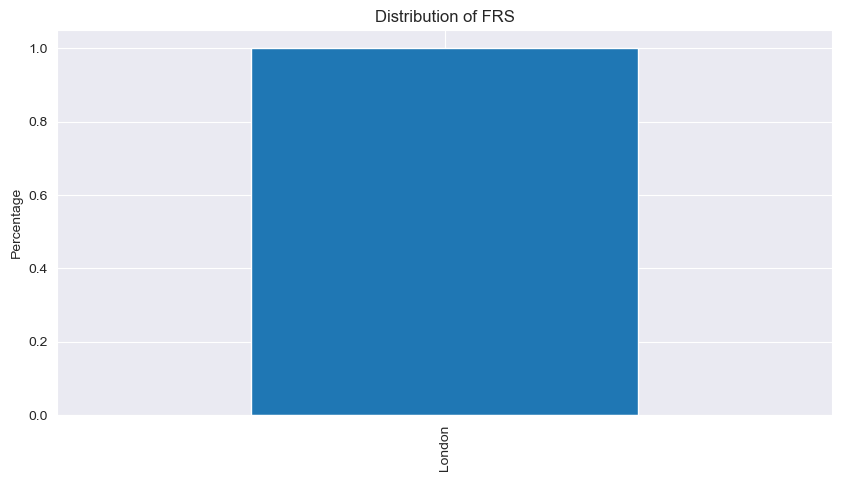



NumStationsWithPumpsAttending modalities in percent:
1.0     53.5
2.0     35.0
3.0      6.4
4.0      2.9
5.0      2.0
6.0      0.1
7.0      0.0
8.0      0.0
9.0      0.0
10.0     0.0
11.0     0.0
13.0     0.0
12.0     0.0
14.0     0.0
15.0     0.0
16.0     0.0
46.0     0.0
17.0     0.0
18.0     0.0
20.0     0.0
23.0     0.0
19.0     0.0
Name: NumStationsWithPumpsAttending, dtype: float64


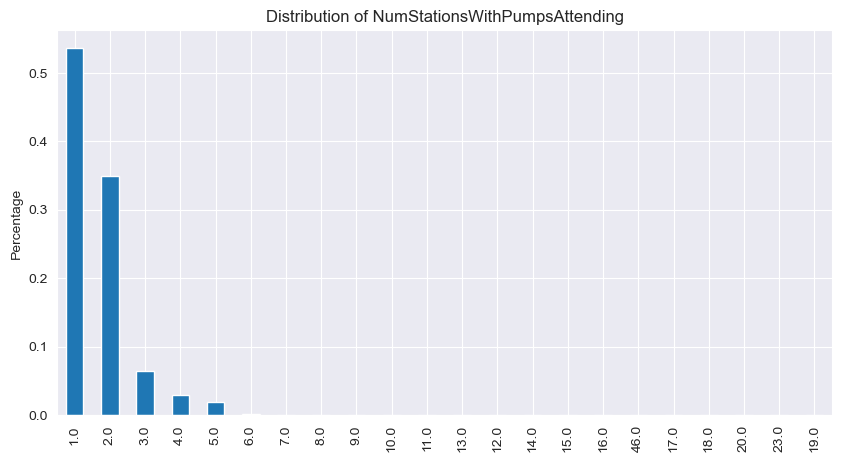

In [13]:
# Identify proportion of modalities (possible biases?)


for column in merged_df.columns:
    if merged_df[column].nunique() <= 25: # if there a less than 25 different modalities continue
        print(f"{column} modalities in percent:")# Calculate and print the proportion of each modality in percentage
        print(merged_df[column].value_counts(normalize=True).round(3)*100)

        # # Plotting the distribution of each modality
        plt.figure(figsize=(10,5))
        merged_df[column].value_counts(normalize=True).plot(kind='bar')
        plt.title(f"Distribution of {column}")
        plt.ylabel('Percentage')
        plt.show()

        print('\n')

In [14]:
# create smaller df for first pump and second pump arriving, so its easier to visualize

firstpump = merged_df[merged_df["PumpOrder"] == 1] # dataframe with first pumps
secondpump = merged_df[merged_df["PumpOrder"] == 2] # dataframe with second pumps

# turn the attendance time into min
firstpump["firstpump_min"] = merged_df["FirstPumpArriving_AttendanceTime"]/60 
secondpump["secondpump_min"] = merged_df["SecondPumpArriving_AttendanceTime"]/60

C:\Users\maxku\AppData\Local\Temp\ipykernel_20172\1392527415.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firstpump["firstpump_min"] = merged_df["FirstPumpArriving_AttendanceTime"]/60
C:\Users\maxku\AppData\Local\Temp\ipykernel_20172\1392527415.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secondpump["secondpump_min"] = merged_df["SecondPumpArriving_AttendanceTime"]/60


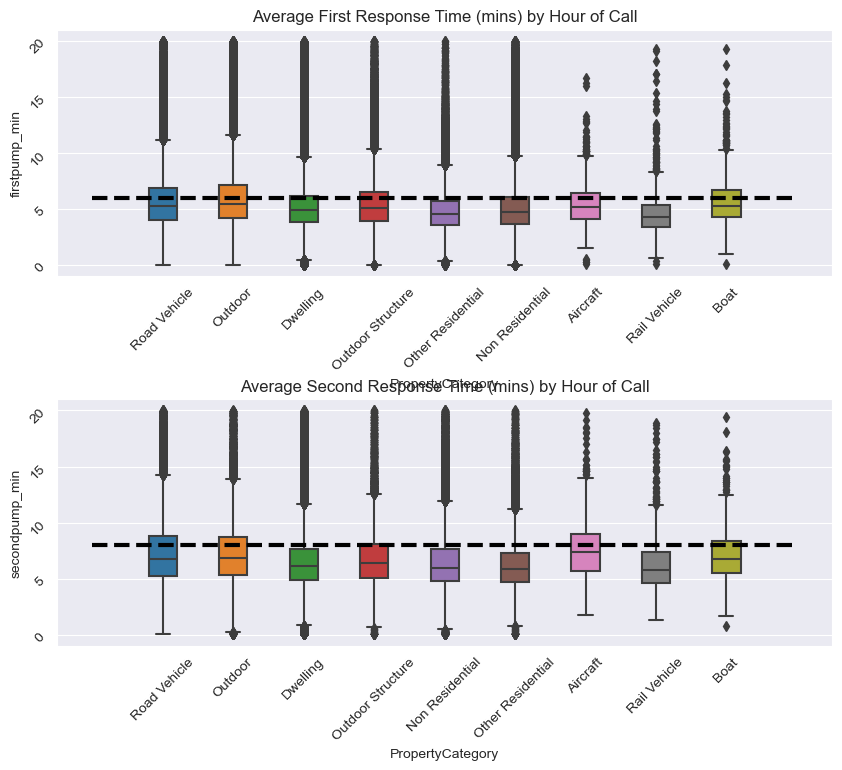

In [15]:
# plot the mean attendance time for first/second pump arriving in min over the property type
fig, axs = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'hspace': 0.5})


# Plot the boxplot for the first pump's response time
sns.boxplot(data=firstpump,x='PropertyCategory', y="firstpump_min", width=0.4, ax=axs[0])
axs[0].set_title('Average First Response Time (mins) by Hour of Call')
axs[0].plot([-1,9],[6, 6], linewidth=3,linestyle='dashed', color="k")
axs[0].tick_params(labelrotation=45)

# Plot the boxplot for the second pump's response time
sns.boxplot(data=secondpump,x='PropertyCategory', y="secondpump_min", width=0.4, ax=axs[1])
axs[1].set_title('Average Second Response Time (mins) by Hour of Call')
axs[1].plot([-1,9],[8, 8], linewidth=3,linestyle='dashed', color="k");
axs[1].tick_params(labelrotation=45)
plt.subplots_adjust(wspace=0.4);

distribution target variable
responsetime depending on Month (color), DelayCode_Description (size), year (subplots)

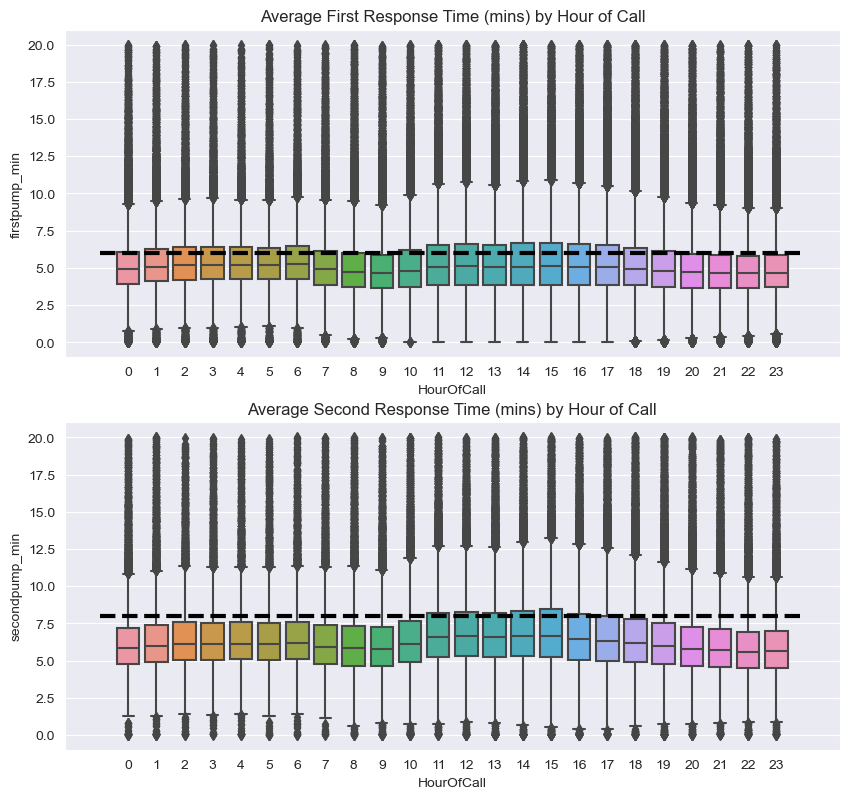

In [16]:
fig, axs = plt.subplots(2,1, figsize=(10,8))
plt.subplots_adjust(bottom=0.1, top=1)

# plot the mean attendance time for first/second pump arriving in min over the hour of call

sns.boxplot(data=firstpump,x='HourOfCall', y="firstpump_min", ax=axs[0])
axs[0].set_title('Average First Response Time (mins) by Hour of Call')
axs[0].plot([-1,24],[6, 6], linewidth=3,linestyle='dashed', color="k")


sns.boxplot(data=secondpump,x='HourOfCall', y="secondpump_min", ax=axs[1])
axs[1].set_title('Average Second Response Time (mins) by Hour of Call')
axs[1].plot([-1,24],[8, 8], linewidth=3,linestyle='dashed', color="k");

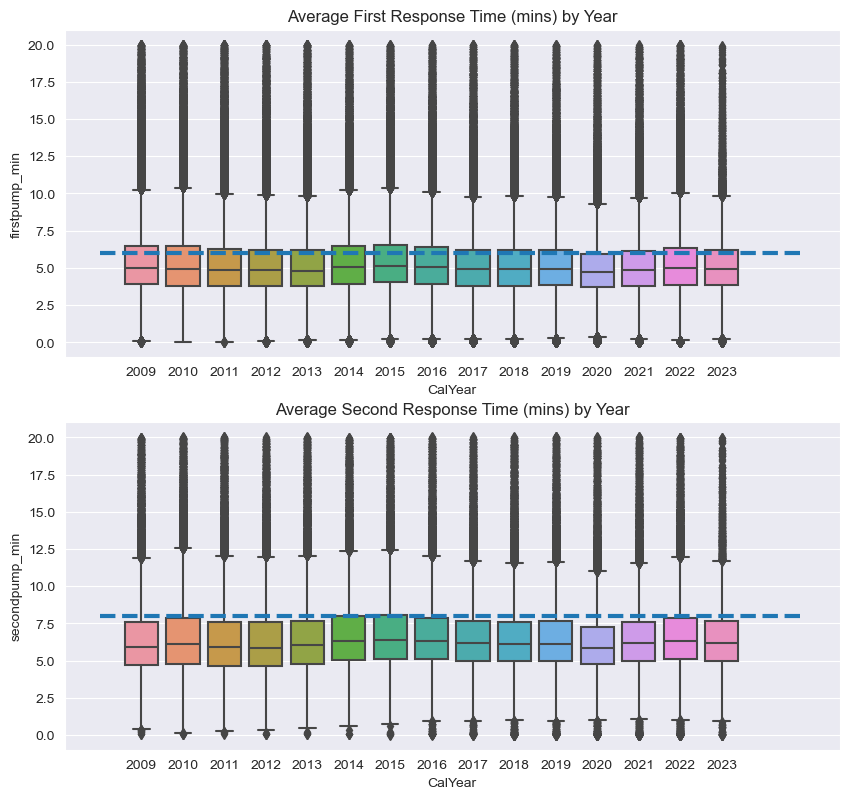

In [17]:
fig, axs = plt.subplots(2,1, figsize=(10,8))
plt.subplots_adjust(bottom=0.1, top=1)

# plot the mean attendance time for first/second pump arriving in min over the years

sns.boxplot(data=firstpump,x='CalYear', y="firstpump_min", ax=axs[0])
axs[0].set_title('Average First Response Time (mins) by Year')
axs[0].plot([-1,16],[6, 6], linewidth=3,linestyle='dashed')

sns.boxplot(data=secondpump,x='CalYear', y="secondpump_min", ax=axs[1])
axs[1].set_title('Average Second Response Time (mins) by Year')
axs[1].plot([-1,16],[8, 8], linewidth=3,linestyle='dashed');

C:\Users\maxku\AppData\Local\Temp\ipykernel_20172\1329261848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firstpump["weekday"] = merged_df["date"].dt.weekday
C:\Users\maxku\AppData\Local\Temp\ipykernel_20172\1329261848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secondpump["weekday"] = merged_df["date"].dt.weekday


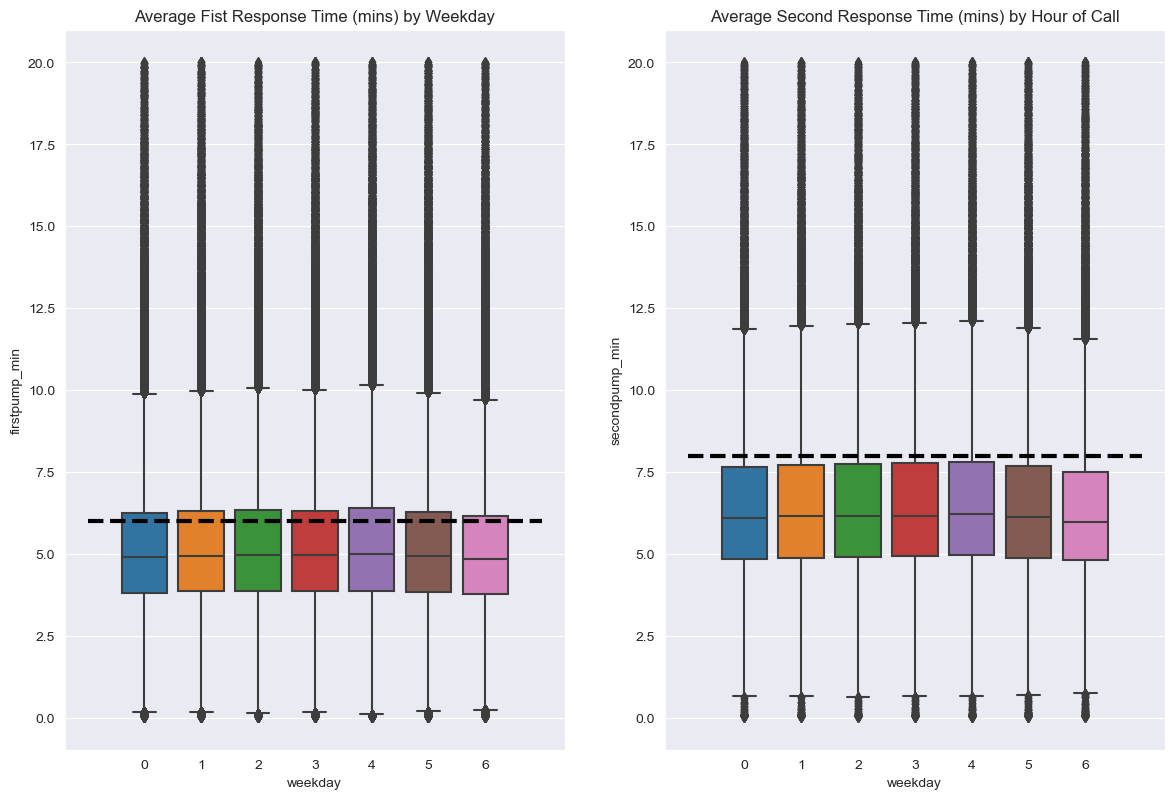

In [18]:
# create a weekday variable
merged_df["date"] = pd.to_datetime(merged_df["DateOfCall"])
firstpump["weekday"] = merged_df["date"].dt.weekday
secondpump["weekday"] = merged_df["date"].dt.weekday

# plot the mean attendance time for first/second pump arriving in min over the weekdays
fig, axs = plt.subplots(1,2, figsize=(8,8))
plt.subplots_adjust(bottom=0.1, top=1, right=1.5)

axs[0].set_title('Average Fist Response Time (mins) by Weekday')
sns.boxplot(data=firstpump,x='weekday', y="firstpump_min", ax=axs[0])
axs[0].plot([-1, 7],[6, 6], linewidth=3,linestyle='dashed', color="k")

axs[1].set_title('Average Second Response Time (mins) by Hour of Call')
sns.boxplot(data=secondpump,x='weekday', y="secondpump_min", ax=axs[1])
axs[1].plot([-1, 7],[8, 8], linewidth=3,linestyle='dashed', color="k");

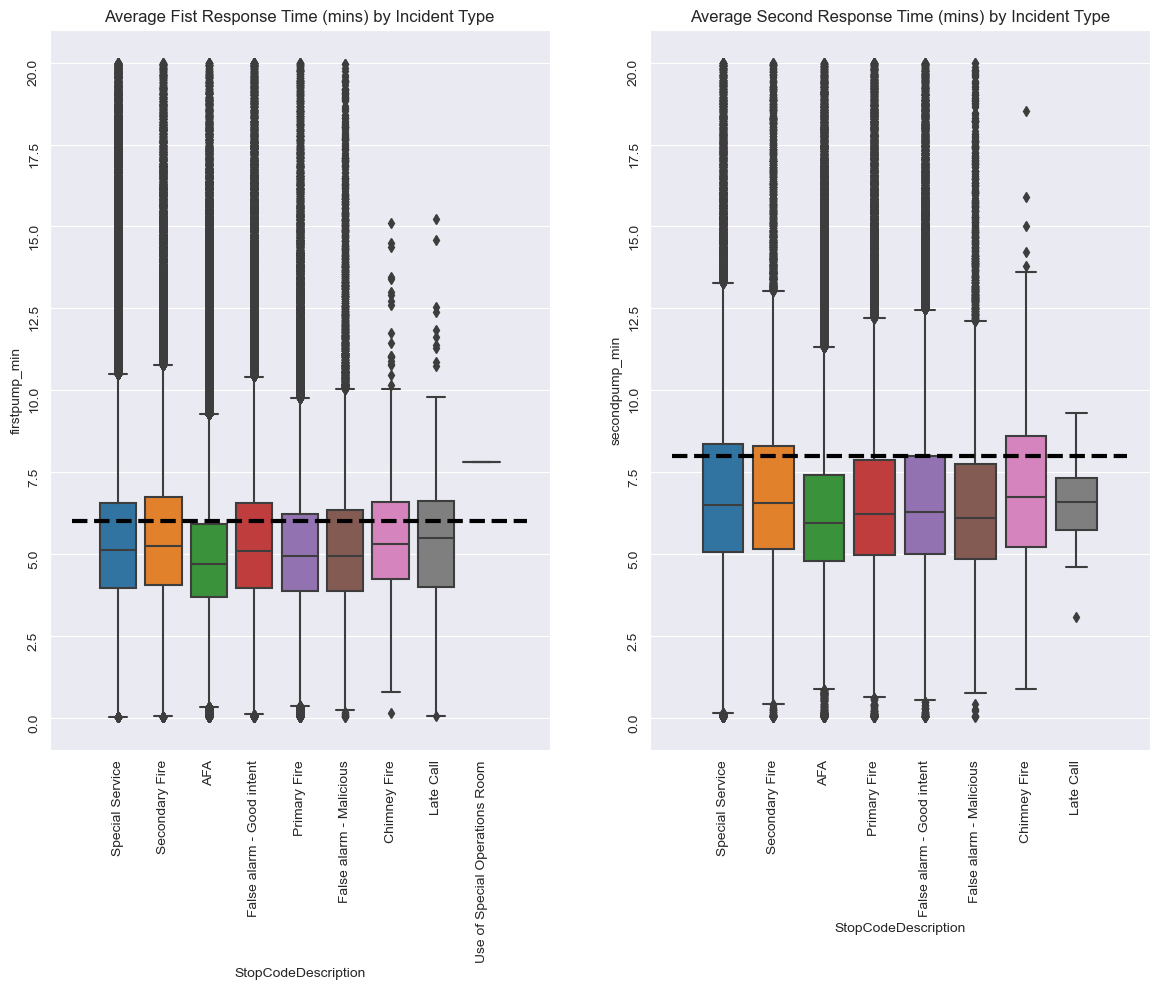

In [19]:
fig, axs = plt.subplots(1,2, figsize=(8,8))
plt.subplots_adjust(bottom=0.1, top=1, right=1.5)

# plot the mean attendance time for first/second pump arriving in min by incident type
axs[0].set_title('Average Fist Response Time (mins) by Incident Type')
sns.boxplot(data=firstpump,x='StopCodeDescription', y="firstpump_min", ax=axs[0])
axs[0].plot([-1, 9],[6, 6], linewidth=3,linestyle='dashed', color="k" )
axs[0].tick_params(labelrotation=90)

axs[1].set_title('Average Second Response Time (mins) by Incident Type')
sns.boxplot(data=secondpump,x='StopCodeDescription', y="secondpump_min", ax=axs[1])
axs[1].plot([-1, 8],[8, 8], linewidth=3,linestyle='dashed', color="k")
axs[1].tick_params(labelrotation=90);

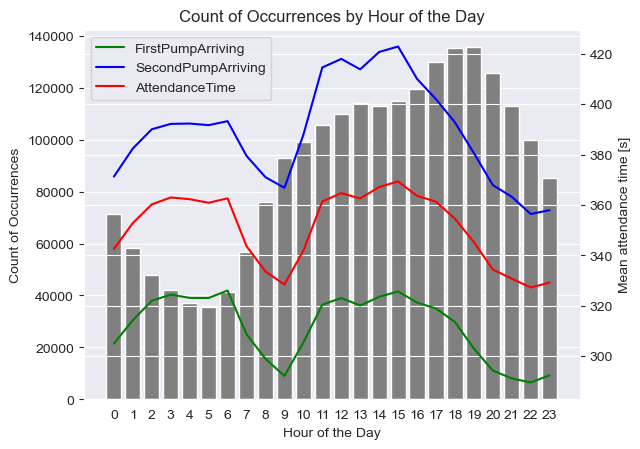

In [20]:
# Visualization of Hourly Occurrences and Mean Attendance Time

# Count the occurrences of each hour of the day in the 'HourOfCall' column and sort by index
hour_counts = merged_df['HourOfCall'].value_counts().sort_index()

fig, ax1 = plt.subplots()

sns.barplot(x=hour_counts.index, y=hour_counts.values, ax=ax1, color ='grey')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Count of Occurrences')
ax1.set_title('Count of Occurrences by Hour of the Day')

# Calculate the mean attendance time for each hour of the day
mean_col1 = merged_df['FirstPumpArriving_AttendanceTime'].groupby(merged_df['HourOfCall']).mean()
mean_col2 = merged_df['SecondPumpArriving_AttendanceTime'].groupby(merged_df['HourOfCall']).mean()
mean_col3 = merged_df['AttendanceTimeSeconds'].groupby(merged_df['HourOfCall']).mean()

ax2 = ax1.twinx()
# plot lines displaying the
sns.lineplot(x=mean_col1.index, y=mean_col1.values, label='FirstPumpArriving', color='green',ax=ax2)
sns.lineplot(x=mean_col2.index, y=mean_col2.values, label='SecondPumpArriving', color='blue', ax=ax2)
sns.lineplot(x=mean_col3.index, y=mean_col3.values, label='AttendanceTime', color='red', ax=ax2)
ax2.set_ylabel('Mean attendance time [s]')

plt.show()

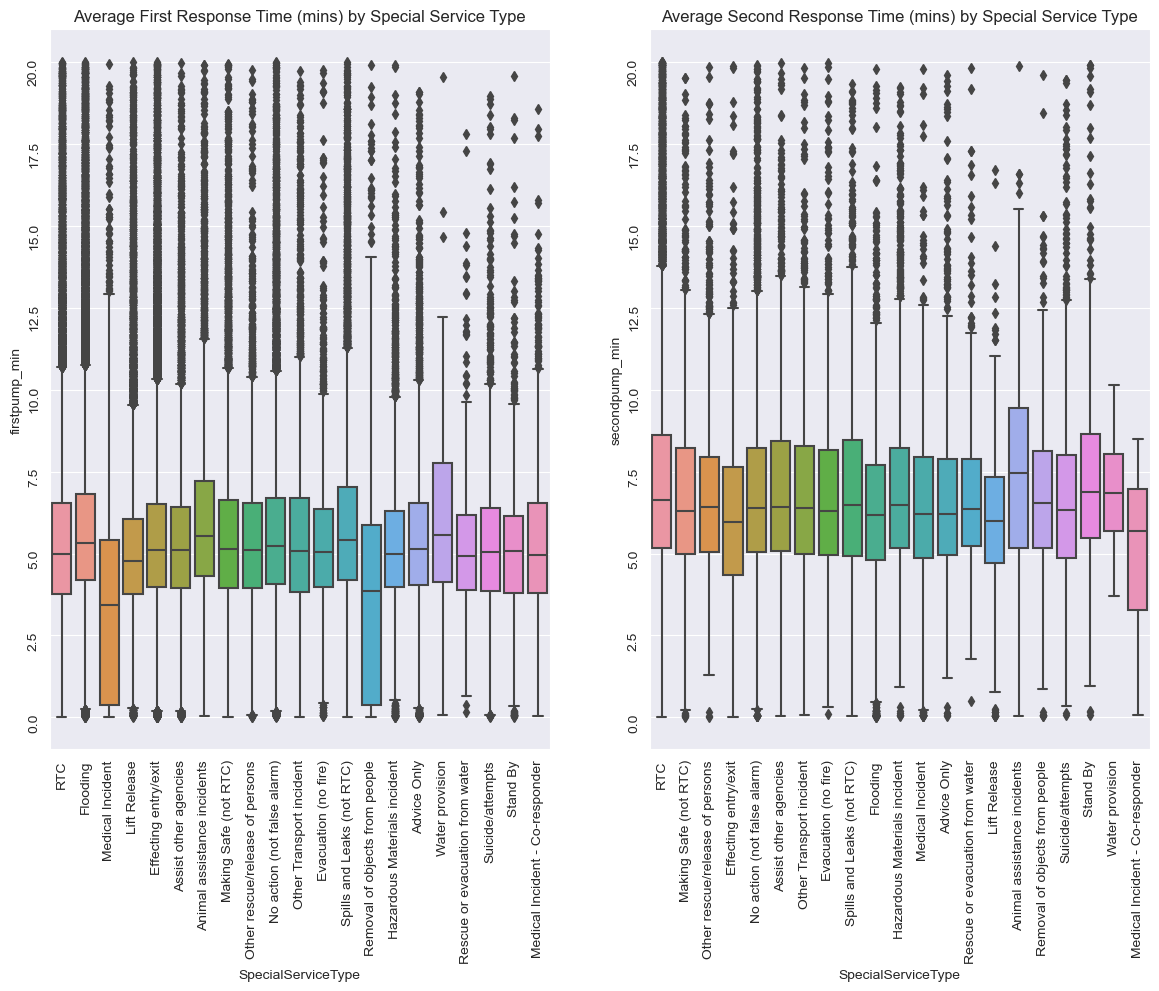

In [21]:
fig, axs = plt.subplots(1,2, figsize=(8,8))
plt.subplots_adjust(bottom=0.1, top=1, right=1.5)

# plot the mean attendance time for first/second pump arriving in min by special service type
sns.boxplot(data=firstpump,x='SpecialServiceType', y="firstpump_min", ax=axs[0])
axs[0].set_title("Average First Response Time (mins) by Special Service Type")
axs[0].tick_params(labelrotation=90)

sns.boxplot(data=secondpump,x='SpecialServiceType', y="secondpump_min", ax=axs[1])
axs[1].set_title("Average Second Response Time (mins) by Special Service Type")
axs[1].tick_params(labelrotation=90);

#### mean attendance time per ward and borough 

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,Time
0,KINGSTON UPON THAMES,E09000021,3726.117,0.0,F,NAN,NAN,"POLYGON ((516401.600 160201.800, 516407.300 16...",383.4048077898367
1,CROYDON,E09000008,8649.441,0.0,F,NAN,NAN,"POLYGON ((535009.200 159504.700, 535005.500 15...",355.1674100903047
2,BROMLEY,E09000006,15013.487,0.0,F,NAN,NAN,"POLYGON ((540373.600 157530.400, 540361.200 15...",398.083858442045
3,HOUNSLOW,E09000018,5658.541,60.755,F,NAN,NAN,"POLYGON ((521975.800 178100.000, 521967.700 17...",376.17602905115774
4,EALING,E09000009,5554.428,0.0,F,NAN,NAN,"POLYGON ((510253.500 182881.600, 510249.900 18...",361.8015460669122


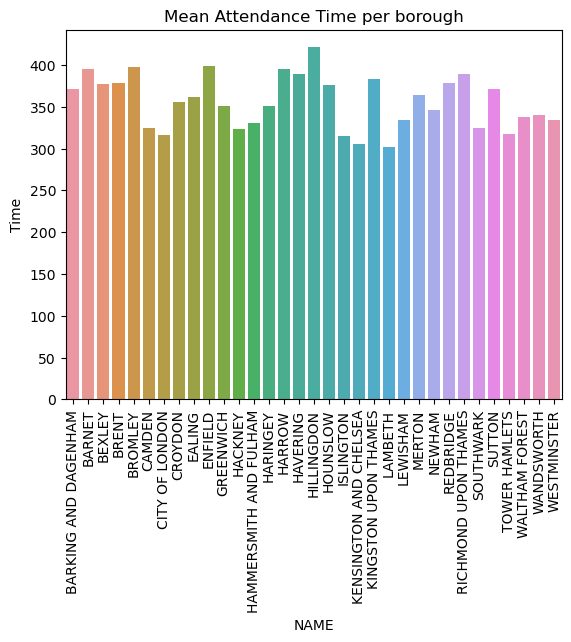

In [3]:
import geopandas as gpd

# group the data by the Borough name and build the mean Attendance time
b =merged_df.groupby('IncGeo_BoroughName', as_index = False)['AttendanceTimeSeconds'].mean()

b.rename({'IncGeo_BoroughName': 'NAME', # rename the column containing borough names to NAME
          'AttendanceTimeSeconds': 'Time'}, axis=1, inplace=True) # rename the column containing the Attendance time to Time
b_big = b.apply(lambda x: x.astype(str).str.upper()) # all names in uppercase letters

borough_file_path = '../data/boroughs_london/ESRI/London_Borough_Excluding_MHW.shp' # set file path for london boroughs file

borough = gpd.read_file(borough_file_path) # import this file as geodataframe
borough_big = gpd.GeoDataFrame(borough.apply(lambda x: x.astype(str).str.upper()), geometry=borough.geometry) # all names in uppercase letters

# merge these dataframes as a geodataframe 
merged_borough = gpd.GeoDataFrame(borough_big.merge(b_big, how='inner', on='NAME'), geometry=borough_big.geometry)
display(merged_borough.head())
type(merged_borough)

# barplot of mean attendance time per borough
sns.barplot(data=b, x='NAME', y='Time')
plt.title('Mean Attendance Time per borough')
plt.xticks(rotation=90);


In [4]:
# set the filepath 
ward_file_path = '../data/London_wards_2018/London/London_Ward_CityMerged.shp'
ward = gpd.read_file(ward_file_path) # import this file as geodataframe

# all names to big letters
ward_big = gpd.GeoDataFrame(ward.apply(lambda x: x.astype(str).str.upper()), geometry=ward.geometry)

# group by ward and get mean attendance time
c = merged_df.groupby('IncGeo_WardNameNew', as_index = False)['AttendanceTimeSeconds'].mean()
c.rename({'IncGeo_WardNameNew': 'NAME',  # rename the column containing borough names to NAME
          'AttendanceTimeSeconds': 'Time'}, axis=1, inplace=True) # rename the column containing the Attendance time to Time
c_big = c.apply(lambda x: x.astype(str).str.upper())  # all names to big letters

# merge the two dataframes
merged_ward = gpd.GeoDataFrame(ward_big.merge(c_big, how='inner', on='NAME'), geometry=ward_big.geometry)
display(merged_ward.head())
type(merged_ward)

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry,Time
0,BERRYLANDS,E05000401,KINGSTON UPON THAMES,E09000021,145.39,0.0,"POLYGON ((516401.596 160201.802, 516407.302 16...",362.44444444444446
1,BERRYLANDS,E05000401,KINGSTON UPON THAMES,E09000021,145.39,0.0,"POLYGON ((519552.998 164295.600, 519508.096 16...",386.4599156118143
2,ALEXANDRA,E05000400,KINGSTON UPON THAMES,E09000021,268.506,0.0,"POLYGON ((518107.499 167303.399, 518114.301 16...",346.59183673469386
3,ALEXANDRA,E05000400,KINGSTON UPON THAMES,E09000021,268.506,0.0,"POLYGON ((520336.700 165105.498, 520332.198 16...",388.79545454545456
4,ALEXANDRA,E05000266,HARINGEY,E09000014,261.385,0.0,"POLYGON ((521201.203 169275.505, 521204.303 16...",346.59183673469386


geopandas.geodataframe.GeoDataFrame

C:\Users\User1\AppData\Local\Temp\ipykernel_3288\3028505973.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


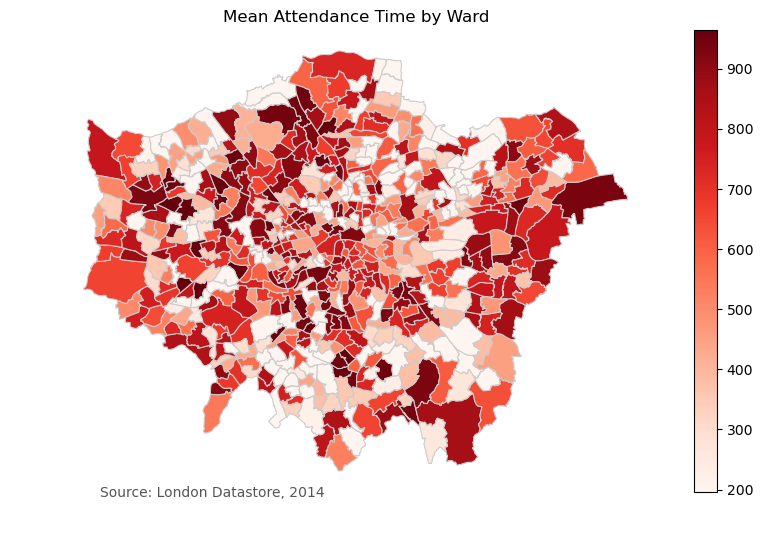

In [5]:
# create a map colored according the attendance time by ward
fig, ax = plt.subplots(1, figsize=(10, 6))

vmin = merged_ward['Time'].min()
vmax = merged_ward['Time'].max()

merged_ward.plot(column='Time', cmap='Reds', linewidth=0.8, edgecolor='0.8', ax=ax, vmin=vmin, vmax=vmax)
ax.set_title('Mean Attendance Time by Ward')
ax.axis('off')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

ax.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555');

C:\Users\User1\AppData\Local\Temp\ipykernel_3288\4231828665.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


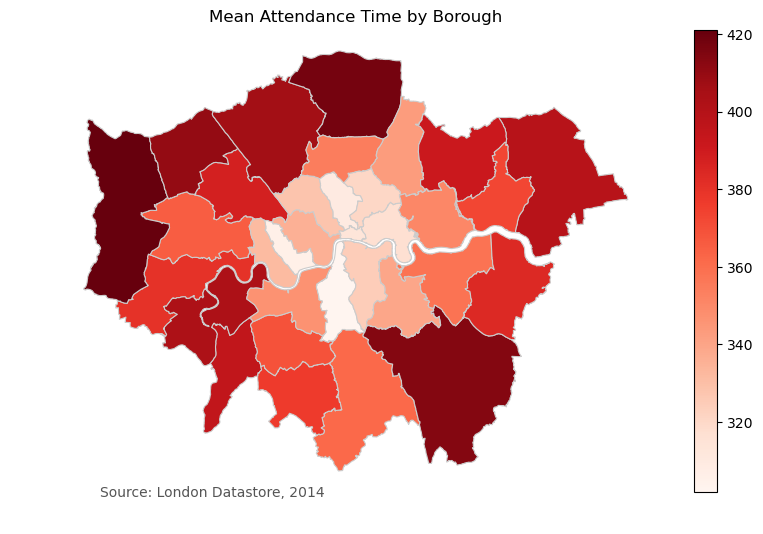

In [6]:
# create a map colored according the attendance time by borough
fig, ax = plt.subplots(1, figsize=(10, 6))

vmin = merged_borough['Time'].min()
vmax = merged_borough['Time'].max()

merged_borough.plot(column='Time', cmap='Reds', linewidth=0.8, edgecolor='0.8', ax=ax)
ax.set_title('Mean Attendance Time by Borough')
ax.axis('off')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

ax.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555');